In [1]:
import sys
sys.path.append(r'/Users/brendanliang/Code/brendans_bloomberg') 
import numpy as np
import pandas as pd
import os
import subprocess
import shlex
import matplotlib.pyplot as plt
from datetime import date
from tools.helper.pandas_tools import find_col_index
from interface.company import Company
from interface.indicator import Yahoo_Indicator
from interface.forex import forex

In [2]:
company = Company("GOOG")

# Share Price History

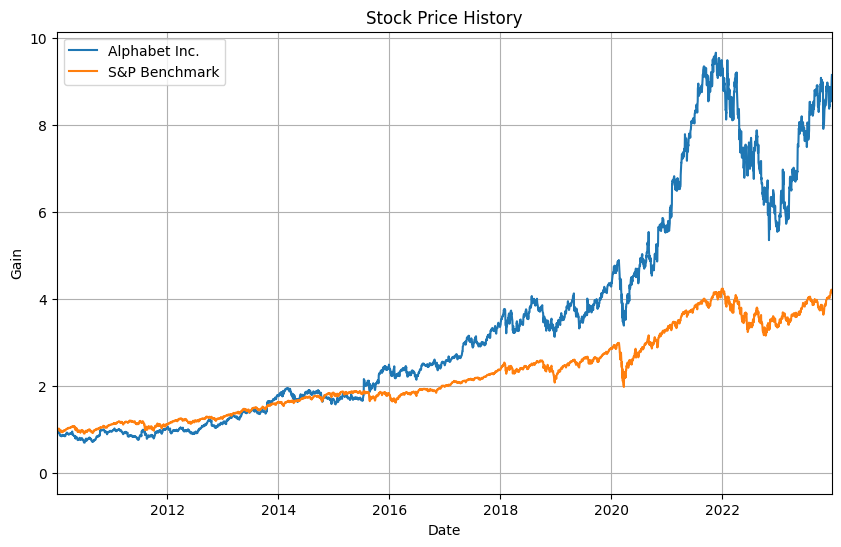

In [11]:
start_date = date(2010,1,4)
company_index = find_col_index(company.get_price_history().dates.transpose(), start_date, 0)
benchmark_index_index = find_col_index(Yahoo_Indicator("^GSPC").dates.transpose(), start_date, 0)
plt.figure(figsize=(10, 6))  # Customize the figure size if needed
plt.plot(company.get_price_history().dates, company.get_price_history().close/float(company.get_price_history().close.iloc[company_index]))  # Use dates or converted values for x-axis
plt.plot(Yahoo_Indicator("^GSPC").dates, Yahoo_Indicator("^GSPC").close/float(Yahoo_Indicator("^GSPC").close.iloc[benchmark_index_index]))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Stock Price History")
plt.grid(True)  # Add a grid for better readability
plt.xlim(start_date, date.today())
plt.legend([str(company.profile.name[0]), "S&P Benchmark"])